# 01 - Data cleaning

### Import packages

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Set base directory 
base_dir = Path(os.getcwd()).parent

# Set default figure directory
fig_dir = base_dir / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

# Set matplotlib backend to PDF-friendly (optional, for consistent rendering)
plt.rcParams["pdf.fonttype"] = 42  # Ensures text is saved as text (not paths)
plt.rcParams["ps.fonttype"] = 42

### Load data

In [2]:
# Load the dataset
data_dir = base_dir / "data" 
data_file = data_dir / "raw" / "HR_capstone_dataset.csv"

# Read the CSV file into a pandas DataFrame
df0 = pd.read_csv(data_file)

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Initial EDA and data cleaning



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [5]:
# Get the list of columns in the DataFrame
columns = df0.columns.tolist()

# Standardize column names
columns = [col.lower().replace(" ", "_") for col in columns]

# Rename 'left' column to 'has_left_company'
columns = ['has_left_company' if col == 'left' else col for col in columns]

# Update the DataFrame with standardized column names
df0.columns = columns

# Display the updated DataFrame with standardized column names
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Rename entries

In [6]:
# Rename entries in the 'has_left_company' column for easier interpretation
df0['has_left_company'] = df0['has_left_company'].replace({1: 'Left', 0: 'Stayed'})

# Convert promotion_last_5years to a categorical variable
df0['promotion_last_5years'] = df0['promotion_last_5years'].replace({1: 'Promoted', 0: 'Not promoted'})

# Convert work_accident to a categorical variable
df0['work_accident'] = df0['work_accident'].replace({1: 'Accident', 0: 'No Accident'})

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
missing_values = df0.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
has_left_company         0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3008


In [9]:
# Inspect some rows containing duplicates as needed
if duplicates > 0:
    print("Sample duplicate rows:")
    print(df0[df0.duplicated()].head())

Sample duplicate rows:
      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company work_accident has_left_company  \
396                    139                   3   No Accident             Left   
866                    128                   3   No Accident             Left   
1317                   127                   3   No Accident             Left   
1368                   132                   3   No Accident             Left   
1461                   142                   3   No Accident             Left   

     promotion_last_5years  department  salary  
396           Not promoted       sales     low  
866           Not promote

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,No Accident,Left,Not promoted,sales,low
1,0.80,0.86,5,262,6,No Accident,Left,Not promoted,sales,medium
2,0.11,0.88,7,272,4,No Accident,Left,Not promoted,sales,medium
3,0.72,0.87,5,223,5,No Accident,Left,Not promoted,sales,low
4,0.37,0.52,2,159,3,No Accident,Left,Not promoted,sales,low


### Check outliers

Check for outliers in the data.

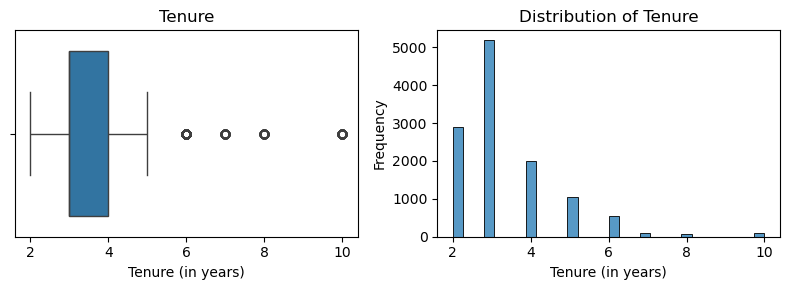

In [11]:
# Show time employee spent at the company
# Visuaize using boxplot & histogram

# Make subplots for boxplot and histogram
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Boxplot for tenure
sns.boxplot(x='time_spend_company', data=df_cleaned, ax=axes[0])
axes[0].set_title('Tenure')
axes[0].set_xlabel('Tenure (in years)')
# Histogram for tenure
sns.histplot(df_cleaned['time_spend_company'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure')
axes[1].set_xlabel('Tenure (in years)')
axes[1].set_ylabel('Frequency') 
# Save the figure
plt.tight_layout()
plt.savefig(fig_dir / 'tenure_distribution.pdf')
plt.show()

In [12]:
# Determine the number of rows containing outliers
# Calculate the IQR for 'time_spend_company'
Q1 = df_cleaned['time_spend_company'].quantile(0.25)
Q3 = df_cleaned['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count the number of outliers
outliers_count = df_cleaned[(df_cleaned['time_spend_company'] < lower_bound) | (df_cleaned['time_spend_company'] > upper_bound)].shape[0]
print(f"Number of outliers in 'time_spend_company': {outliers_count}")
# Remove outliers from the DataFrame
df_no_outliers = df_cleaned[(df_cleaned['time_spend_company'] >= lower_bound) & (df_cleaned['time_spend_company'] <= upper_bound)]

Number of outliers in 'time_spend_company': 824


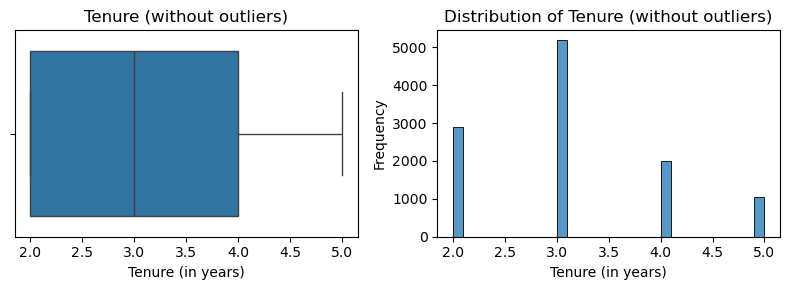

In [13]:
# Replot the boxplot and histogram without outliers
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Boxplot for tenure without outliers
sns.boxplot(x='time_spend_company', data=df_no_outliers, ax=axes[0])
axes[0].set_title('Tenure (without outliers)')
axes[0].set_xlabel('Tenure (in years)')
# Histogram for tenure without outliers
sns.histplot(df_no_outliers['time_spend_company'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure (without outliers)')
axes[1].set_xlabel('Tenure (in years)')
axes[1].set_ylabel('Frequency')
# Save the figure
plt.tight_layout()
plt.savefig(fig_dir / 'tenure_distribution_no_outliers.pdf')
plt.show()

In [14]:
df_no_outliers.to_csv(data_dir / 'processed' / 'HR_capstone_dataset_no_outliers.csv', index=False)